Notebook 0 — Dataset Sanity Check & Understanding
Objective (what this notebook proves)

By the end of Notebook 0, I should be able to confidently say:

I understand what a sample is (WSI, not patch)

The split is correct and respected

There is no data leakage

I know the class distribution

I know what the patches look like spatially and visually

This notebook will also generate figures and numbers that can be reuse in report.

**Load the dataset metadata (single source of truth)**

In [6]:
import pandas as pd
import os

DATA_ROOT = "/kaggle/input/01-wsi-level-stratified-split"
CSV_PATH = os.path.join(DATA_ROOT, "patches_metadata_with_split.csv")

df = pd.read_csv(CSV_PATH)
print(df.shape)
df.head()

(16800, 6)


,patch_path,wsi_id,x,y,label,split
0,/kaggle/working/patches/normal_074_x54016_y698...,normal_074,54016,69888,0,train
1,/kaggle/working/patches/normal_074_x18688_y744...,normal_074,18688,74496,0,train
2,/kaggle/working/patches/normal_074_x48640_y757...,normal_074,48640,75776,0,train
3,/kaggle/working/patches/normal_074_x50688_y757...,normal_074,50688,75776,0,train
4,/kaggle/working/patches/normal_074_x50944_y757...,normal_074,50944,75776,0,train


In [7]:
df.columns

Index(['patch_path', 'wsi_id', 'x', 'y', 'label', 'split'], dtype='object')

In [8]:
wsi_split = df.groupby("split")["wsi_id"].nunique()
wsi_split

split
test      9
train    39
val       8
Name: wsi_id, dtype: int64

**Double Checking no WSI appears in multiple splits**

In [9]:
wsi_split_check = df.groupby("wsi_id")["split"].nunique()
(wsi_split_check > 1).sum()

np.int64(0)

**Class Distribution at WSI**

In [10]:
wsi_labels = (
    df[["wsi_id", "label"]]
    .drop_duplicates()
    .value_counts()
)

wsi_labels

wsi_id      label
normal_074  0        1
normal_077  0        1
normal_078  0        1
normal_081  0        1
normal_088  0        1
normal_089  0        1
normal_090  0        1
normal_094  0        1
normal_107  0        1
normal_110  0        1
normal_111  0        1
normal_114  0        1
normal_119  0        1
normal_120  0        1
normal_122  0        1
normal_129  0        1
normal_131  0        1
normal_136  0        1
normal_139  0        1
normal_144  0        1
normal_145  0        1
normal_146  0        1
normal_149  0        1
normal_151  0        1
tumor_025   1        1
tumor_026   1        1
tumor_027   1        1
tumor_028   1        1
tumor_029   1        1
tumor_031   1        1
tumor_073   1        1
tumor_074   1        1
tumor_075   1        1
tumor_076   1        1
tumor_077   1        1
tumor_078   1        1
tumor_079   1        1
tumor_080   1        1
tumor_081   1        1
tumor_082   1        1
tumor_083   1        1
tumor_085   1        1
tumor_086   1   

**Class Distribution per split**

In [11]:
wsi_labels_split = (
    df[["wsi_id", "label", "split"]]
    .drop_duplicates()
    .value_counts(["split", "label"])
)

wsi_labels_split

split  label
train  1        22
       0        17
val    1         5
test   1         5
       0         4
val    0         3
Name: count, dtype: int64

In [12]:
patches_per_wsi = df.groupby("wsi_id").size()

patches_per_wsi.describe()

count     56.0
mean     300.0
std        0.0
min      300.0
25%      300.0
50%      300.0
75%      300.0
max      300.0
dtype: float64

<Axes: >

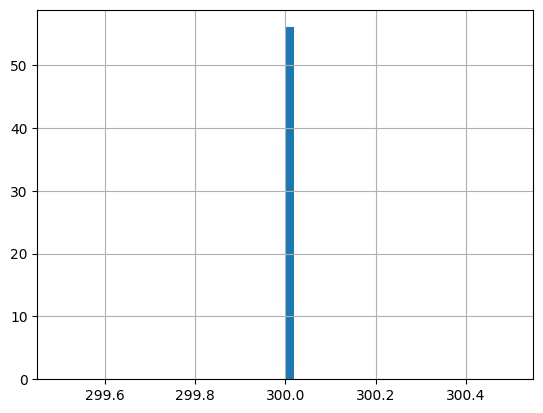

In [13]:
patches_per_wsi.hist(bins=50)

**Visualize random patches (sanity check)**

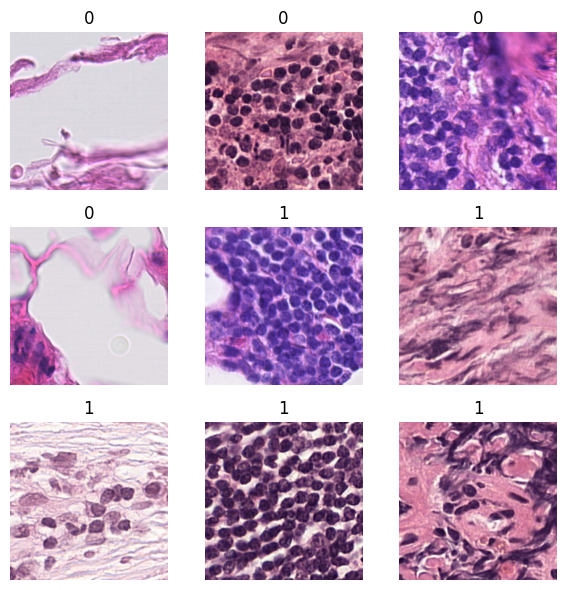

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

PATCH_DIR = "/kaggle/input/camelyon-prepro-v4-patches/patches"
sample_rows = df.sample(9, random_state=42)
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for ax, (_, row) in zip(axes.flatten(), sample_rows.iterrows()):
    img = Image.open(os.path.join(PATCH_DIR, os.path.basename(row["patch_path"])))
    ax.imshow(img)
    ax.set_title(row["label"])
    ax.axis("off")
plt.tight_layout()


**Visualize spatial layout for ONE WSI (important insight)**

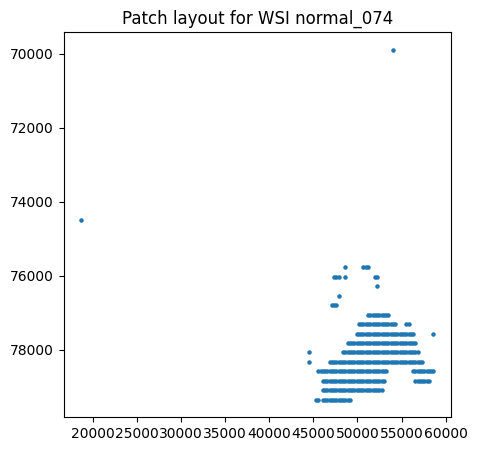

In [16]:
example_wsi = df["wsi_id"].iloc[0]
wsi_df = df[df["wsi_id"] == example_wsi]

plt.figure(figsize=(5, 5))
plt.scatter(wsi_df["x"], wsi_df["y"], s=5)
plt.title(f"Patch layout for WSI {example_wsi}")
plt.gca().invert_yaxis()
plt.show()
